In [58]:
import datetime
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt
import matplotlib.pyplot as plt

In [48]:
crimearea = pd.read_csv('BPD_Arrests.csv')

In [42]:
df = pd.read_csv('nhood_2010.csv')
df.rename(columns={"the_geom":"geometry"},inplace=True)
df.geometry = df.geometry.apply(lambda var: wkt.loads(var))
gdf = gpd.GeoDataFrame(df)

In [106]:
a = pd.to_datetime(crimearea.ArrestDate)
a.apply(lambda var: var.year).min()

2017

In [54]:
gdf["crime_count"] = gdf.LABEL.apply(lambda var: len(crimearea[crimearea.Neighborhood == var]))

In [63]:
df = pd.read_csv('RealPropertiesExtraClean.csv')
df.rename(columns={"Parcel":"geometry"},inplace=True)
df.geometry = df.geometry.apply(lambda var: MultiPolygon([wkt.loads(var)]))
gdf2 = gpd.GeoDataFrame(df)
gdf2["Block"] = gdf2.BlockLot.apply(lambda num: num[:4])

In [70]:
gdf2 = gdf2[gdf2.IsVacant == 1]

In [71]:
gdf2["centroid"] = gdf2.centroid 

## the vacant houses footprint & number of crime group by neighborhood from 2017 - 2018

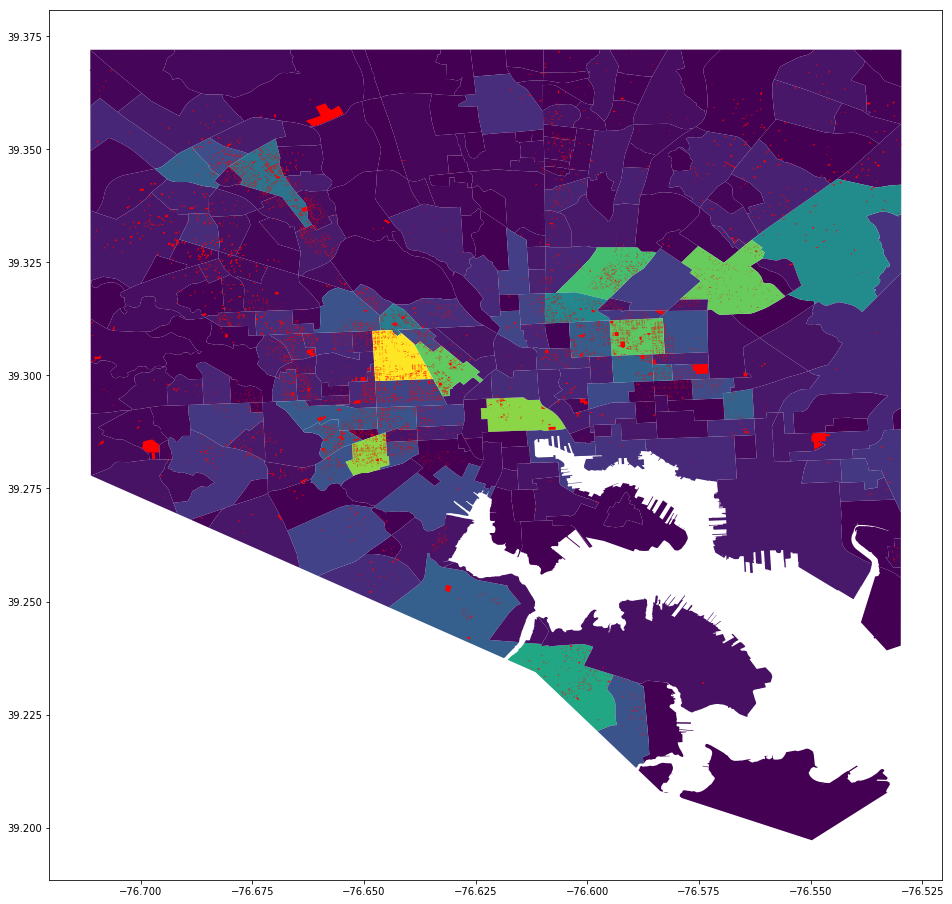

In [74]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(111)
gdf.plot(column = "crime_count",ax = ax)
gdf2.plot(color = "r",ax = ax)

In [76]:
new =  pd.read_csv('Vacant_Buildings.csv')

In [78]:
new.NoticeDate = pd.to_datetime(new.NoticeDate)

In [81]:
new["year"] = new.NoticeDate.apply(lambda var: var.year)
new["month"] = new.NoticeDate.apply(lambda var: var.month)

In [102]:
plt.figure(figsize = (16,16))
a = new[new.year < 2018].groupby("year").count().Lot

In [103]:
import seaborn as sns

# the number of vacant houses from 1993 - 2017

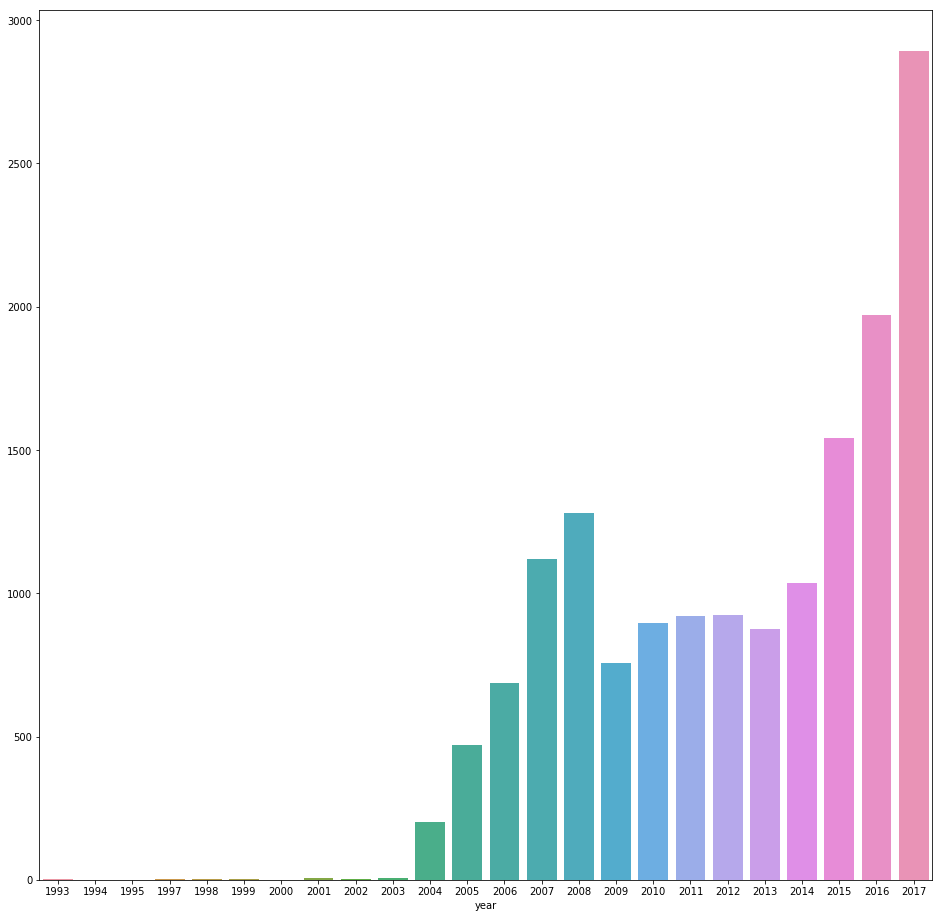

In [104]:
plt.figure(figsize = (16,16))
sns.barplot(x = a.index, y = a.values)

## Need more data from zillow